In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import numpy as np # linear algebra
import pandas as pd 
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [8]:
df = pd.read_csv("./shampoo.csv")
df.set_index('Month', inplace=True)
df.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [9]:
# split into train set and test set
train, test = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

In [12]:
train_ar = train['Sales'].values
test_ar = test['Sales'].values

history = [x for x in train_ar]
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_ar, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 101.643


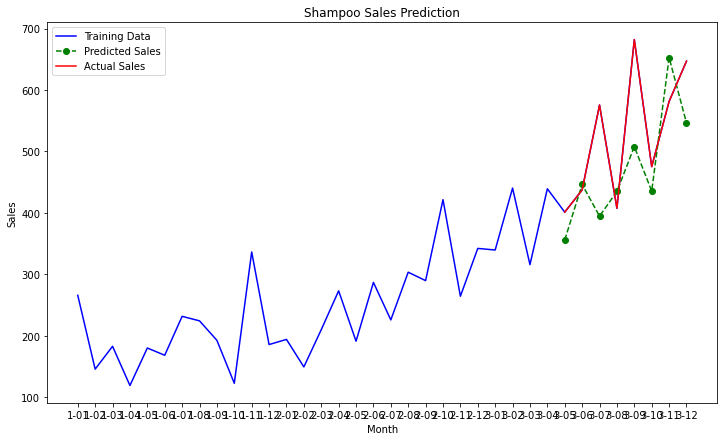

In [13]:
plt.figure(figsize=(12,7))
plt.plot(df['Sales'], 'green', color='blue', label='Training Data')
plt.plot(test.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Sales')
plt.plot(test.index, test['Sales'], color='red', label='Actual Sales')
plt.title('Shampoo Sales Prediction')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()